# An Analysis on Buying Statistically “Cheap” Value vs “Expensive” Growth Stocks and IPOs

Everyone understands the idea that investors are supposed to buy high and sell low. But thinking back since the end of the technology bubble in 2001, we can say without question that some of the best performing stocks of the last twenty years have been technology stocks such as Google, Amazon and Amazon, and one thing that we know about many of these stocks is that they have never been statistically cheap by traditional measures. That brings us to the first question, what is a cheap stock? For our purposes, we will use metrics defined by Ron Bird and & Lorenzo Casavecchia in their paper Sentiment and financial health indicators for value and growth stocks: The European experience. They identified three main valuation metrics that are often used to determine if stocks are cheap of if they are expensive. Those three are book to market, sales to price, and earnings to price (Bird & Casavecchia, 2007). 

We will look at these as well as other metrics to try to determine if you would be better off buying a group of statistically cheap stocks, or if you would be better off buying the more expensive stocks because having the next Google in your portfolio could do more for you than buying low. On the other hand, maybe, owning cheap stocks might not a good idea because the stocks are probably cheap for a reason, we will look into this later. The purpose of trying to pick stocks of course is to try to beat the market generally. According to Louis K.C. Chan and Josef Lakonishok’s paper Value and Growth Investing: Review and Update, value tends to outperform growth stocks over long periods of time although others will argue that value is dead at this point (Chan & Lakonishok, 2004).  In this paper, we will test to see if value outperforms and ask if they will probably outperform in the future. For the market as a whole, we will use the S&P 500 as our benchmark, because finding if our findings do not outperform the S&P 500, then it is not worth our time to use the strategies we are considering trying to beat the market if we can just do better without any effort. Lastly, the time period that we will be using will be from March 3rd, 2009 (the lowest point during the housing crisis) through September 29, 2022 (the lowest point in the current market downturn). During that time, the S&P returned roughly 15% when you assume dividends were reinvested over this period. This means we need to try to find a strategy that will produce a return of better that 15% over that same period. It is important to note that these returns are before taxes, taxes would play an important factor in the amount of realized returns and would make a material difference depending on if all returns are paid out as dividends or if all of the gains are kept in the company leading to an increased stock price. This fact will be ignored for this paper except when talking about the effect of dividends on returns which is discussed later.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_excel("Econ 411 Data Set 2.xlsx")
df1 = pd.DataFrame(data)
df1

,Ticker,Short Name,Market Cap:20090309 (B),P/E:20090309,Percentile Rank(P/E as of 20090309),Total Return:20090309:20220929 (including dividends),Market Cap:20220929,Total Return:20090309:20220929 (annualized including dividends),Total Returns in B Dollars
0,TXP CN Equity,TOUCHSTONE EXPLO,1.661330,0.333624,1.0,-36.868274,2.441166e-01,-0.033333,-0.612250
1,HIG US Equity,HARTFORD FINL SV,1.333441,0.432946,1.0,1880.923503,2.024487e+01,0.246204,25.039615
2,ONEX CN Equity,ONEX CORP,1.599594,0.964650,1.0,405.418319,5.366819e+00,0.126846,6.478173
3,X US Equity,US STEEL CORP,2.024171,0.967536,1.0,18.093743,4.398189e+00,0.012334,0.366040
4,TECK/B CN Equity,TECK RESOURCES-B,1.853044,1.072046,1.0,1338.918694,2.221067e+01,0.217184,24.773445
...,...,...,...,...,...,...,...,...,...
320,TFSL US Equity,TFS FINANCIAL CO,3.526884,75.466665,100.0,73.889937,3.665814e+09,0.041622,2.604231
321,RGLD US Equity,ROYAL GOLD INC,1.299480,81.297871,100.0,183.810403,6.099237e+09,0.079920,2.386560
322,CRM US Equity,SALESFORCE INC,3.768580,88.050851,100.0,1801.068313,1.468100e+11,0.242430,67.764010
323,NJR US Equity,NEW JERSEY RES,1.309337,88.324045,100.0,303.652235,3.821229e+09,0.108326,3.971962


TypeError: 'method' object is not iterable

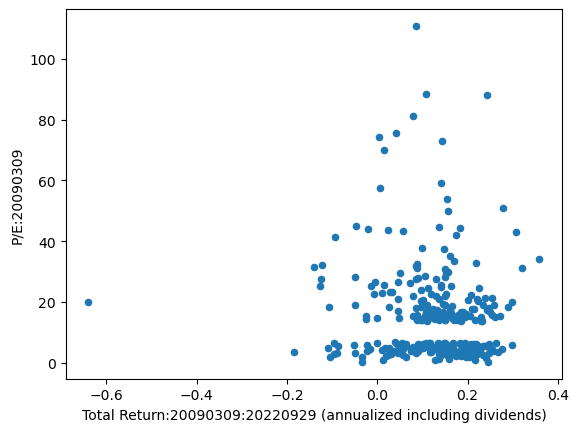

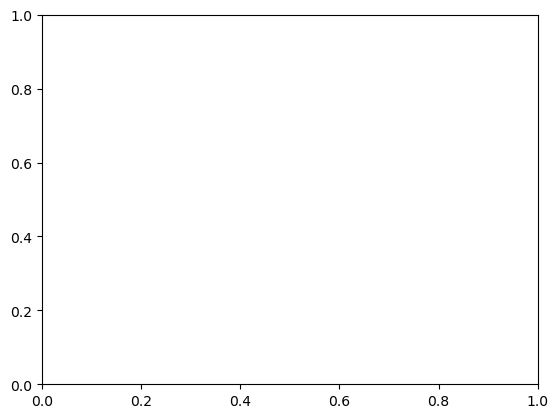

In [4]:
df1.plot.scatter("Total Return:20090309:20220929 (annualized including dividends)","P/E:20090309")
fig, ax = plt.subplots()
x_ticklabels = ["$" + str(x) for x in df1.plot.scatter]

Another way of measuring the relative cheapness of a company is looking at their price to sales of the companies. To do that, we can plot companies on a graph with the price to sales graph on one axis and annualized return on the other axis. This particular graph is harder to take much away from due to the fact that there is a significant outlier in the group. If we take out the outlier though, a couple of things pop out immediately. First the three companies with the highest individual returns are all companies in the highest 25th percentile of price to sales, but the companies are all near the bottom of the range, all with price to sales of under-five. The next thing that jumps out is how few of the companies with low price to sales had negative returns compared to the number of high price to sales companies with negative returns. Only six of 171 companies in the low price to sales ratio group had negative returns over the investment timeframe, so less than 4% of the companies in that group. The high price to sales ratio group on the other hand had 22 of their 172 companies record negative returns over the investment period resulting in just under 13% of those companies providing negative returns over the period for their shareholders. Not losing money is a very important idea for portfolios because a permanent loss of capital is a very hard thing for a portfolio to overcome. When we look at the percentage of companies that record over a 15% annual return during the investment timeframe, companies with price to sales ratios below 0.4 (the bottom 25%) had a 50.87% chance (87 of 171) of returning over 15% annually during the investment period. On the other hand, companies with a price to sales over 1.66 (the 75th percentile) had a 35.47% chance (61/172) of returning over 15% annually over the same period. The entire group had a 43% rate (148/343) of beating the 15% hurdle rate over the investment period meaning that someone could with a small selection of stocks beat the S&P 500 by random luck, but both the price to earnings and the price to sales seem to suggest that the companies that are statistically cheap at the median will perform better over a full market cycle than statistically expensive companies.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data2 = pd.read_excel("Data for Econ 411.xlsx")
df = pd.DataFrame(data2)
df

,Ticker,Short Name,Total Return:20090309:20220929,Market Cap (Billions),Total Return:20090309:20220929 (Annualized),Market Cap:20090309 (Billions),P/S:20090309,Percentile Rank(P/S as of 20090309),Unnamed: 8,Unnamed: 9
0,FMCC US Equity,FREDDIE MAC,40.675675,1.519716e+09,2.547450,1.191287,0.012687,1.0,0.0,NaN
1,FNMA US Equity,FANNIE MAE,32.358981,2.708254e+00,2.087872,2.117313,0.017650,1.0,0.0,NaN
2,F US Equity,FORD MOTOR CO,898.855659,5.335196e+01,18.487065,4.169598,0.027093,1.0,1.0,NaN
3,FLEX US Equity,FLEX LTD,807.526830,1.061845e+10,17.652596,1.505777,0.046423,1.0,1.0,NaN
4,ONEX CN Equity,ONEX CORP,405.418319,5.652614e+00,12.684562,1.599594,0.049200,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
339,FNV CN Equity,FRANCO-NEVADA CO,618.215935,3.745693e+01,15.641175,2.666977,13.396963,100.0,1.0,NaN
340,RGLD US Equity,ROYAL GOLD INC,183.810403,8.412898e+00,7.992010,1.299480,18.018374,100.0,0.0,NaN
341,AEM CN Equity,AGNICO EAGLE MIN,9.428289,3.452028e+01,0.666310,9.709309,18.918057,100.0,0.0,NaN
342,VRTX US Equity,VERTEX PHARM,986.053404,8.251347e+01,19.220269,4.103037,21.458390,100.0,1.0,NaN


In [8]:
data2[["Total Return:20090309:20220929 (Annualized)",'P/S:20090309' ]]

,Total Return:20090309:20220929 (Annualized),P/S:20090309
0,2.547450,0.012687
1,2.087872,0.017650
2,18.487065,0.027093
3,17.652596,0.046423
4,12.684562,0.049200
...,...,...
339,15.641175,13.396963
340,7.992010,18.018374
341,0.666310,18.918057
342,19.220269,21.458390


<AxesSubplot:xlabel='Total Return:20090309:20220929 (Annualized)', ylabel='P/S:20090309'>

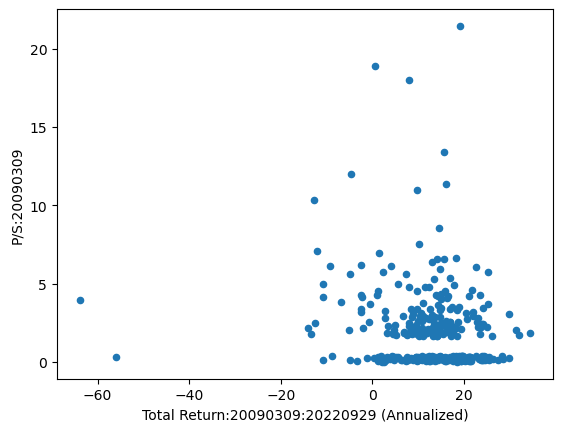

In [10]:
df.plot.scatter("Total Return:20090309:20220929 (Annualized)",'P/S:20090309')

<AxesSubplot:xlabel='Total Return:20090309:20220929 (Annualized)', ylabel='P/S:20090309'>

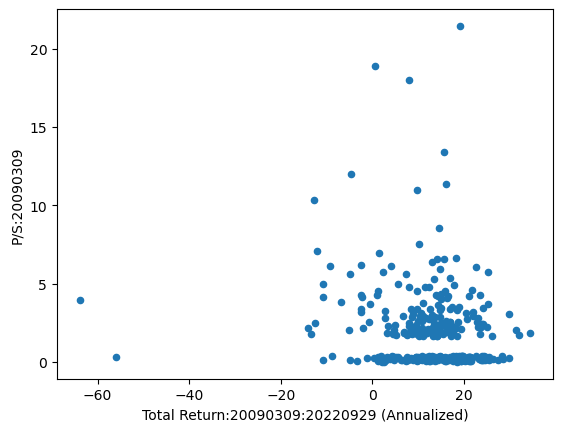

In [9]:
df = df.drop(df.index[-1])
df.plot.scatter("Total Return:20090309:20220929 (Annualized)",'P/S:20090309')

That is an important point, the idea that a significantly higher percentage of value of value stocks are clearing a 15% hurdle rate annually, but that does not tell the entire story either. Beating the market with value stocks is an outstanding thing, but we will still have to ask the question of could the higher performance of a couple of growth companies overcome the lower performance of some other growth companies. While a 15% annual rate of return is outstanding, $1 turning into $4.05 ten years later, a growth stock returning 25% for ten years turns into $9.31, well over double the 15% return. There are a couple of important things that we should consider when thinking about growth stock returns vs value stock returns and both items come down to the idea of how dividends could effect returns. First, let’s consider two companies that produce a 15% return each to shareholders, one pays out all of their earning while the other company retains them, are those returns guaranteed to produce the same returns for shareholders? Assuming that the companies’ values are growing in line with earnings, then the returns are very different. According to Fama and French in The Anatomy of Value and Growth Stock Returns, there are three ways for a stock to create returns. The first way is through dividends, the seconds is through an increase in increasing earnings by retaining earnings for reinvestment. The third way is for multiples expansion (higher P/E, P/B etc.) (Fama & French, 2019).  For the sake of this discussion, we will ignore multiples expansion and only focus on retention of earnings vs the paying out of dividends to see how they affect returns because multiple expansion will be random and not something that investors can project, so investors are unlikely to benefit from it as a group (they may even do worse because of them do to how people panic when things go wrong and can sell at the wrong time). It turns out retaining earnings or paying out dividends can make returns very different. Let’s for the sake of argument assume that the growth stock pays out zero dividends while the value stock is paying out all of its earnings in dividends. After 10 years, $1 in the growth stock is worth $4.05 as mentioned earlier, but what is the value of all of your dividends plus your $1 of initial capital you invested in the value stock? It is worth $2.50, the $1 you originally invested plus $0.15 per year that you received in dividends. You may be thinking that as long as you are able to reinvest those dividends back into the company you will do just as well, and you would be correct, assuming that the stock price never moves (if the stock went up, you would underperform, if it went down, you would overperform). However, this also assumes that you are paying no taxes on this money. If you figure in a 20% tax rate of dividends, you wind up with $3.11 after 10 years compared to $3.44 by paying taxes on just capital gains at the end of the period. By having to pay taxes annually of dividends, you are giving up 9.5% of your total return over the 10-year period compared to if you were able to keep if the company were able to reinvest their profits for you and you only having to pay taxes on the capital gains upon the sale of your stock, see chart below. People may favor dividends for reasons that are not purely economical, for example, elderly people may be more worried about getting cash to live on than maximizing their long-term gains for tomorrow, but these reasons are beyond the scope of this discussion.

While it is clear that the last economic cycle was better to buy expensive growth stocks, asking if this can continue in the current cycle is a fair and important question for investors to continue into the future a couple of reasons. First, could it be that the growth’s outperformance was overly concentrated in a small group of stock, for example the FAANG stocks (Facebook, Amazon, Apple, Netflix and Google) and these companies are too entrenched to be defeated meaning that there will not be new growth companies achieving this scale, although this seems unlikely. The graph below shows some interesting information, immediately you can see that about 10 companies are providing a disproportionate amount of the total dollar returns that the growth stocks are producing and there are some reasons to believe that this cannot continue into the future. 

This leads me to a second question, with companies staying private longer, will investors be able to perform as well with today’s new growth companies (Uber, Facebook, and soon Stripe) going publics for valuations of over $80B when many of the biggest growth companies of the past (Microsoft and Amazon etc.) were going public for under $1 billion? Ultimately, I think we can say two things, first this will be a bigger deal for growth companies than value companies (because value companies become value companies due to market fluctuations, not business performance), and the jury is still out on how much growth investors will be able to get out of their newly IPOed investments. For example, Facebook IPO’ed with a valuation of $104B in 2012 (Onion et al., 2012), and at one point was worth over $1 trillion, but Uber which IPO’ed for $82B in 2019 (Merced & Conger, 2019) is down 25% from its IPO valuation and today only has a market cap of $62B. These are only a couple of examples, but they show the range of possible outcomes for companies with large IPOs in the future, although it seems fair to say that more have to end up being like Uber than like Facebook. The fact that so much value creation occurs outside the public markets will be hard on investor, for example, while Facebook has been up as high as roughly 1,000% (10 times) from its IPO valuation, Microsoft has been up over 130,000% (1,300 times) from its IPO valuation. If this trend continues of more and more of the value being collected by the private markets, it seems likely that growth investors will struggle to succeed at outperforming value.   

When thinking about how these large IPOs will perform in the future, it is best to look back at the past performance of IPOs to determine the chances of their success into the future. According to Rafał Sieradzki’s Does it Pay to Invest in IPOs? Evidence from the Warsaw Stock Exchange explains that within one month, the average return on an IPO is negative and they are still negative one year after the initial IPO (Sieradzki, 2013). The below graph shows how recent American IPOs have gone. It makes sense that IPOs are underperforming, management is picking when to see a part of their company, so it is unlikely that they would sell at a time when they are not getting a good price for what they are selling. In their paper Initial Public Offerings in Hot and Cold Markets, Jean Helwege and Nellie Liang make the point that what really distinguishes a hot IPO market from a cold IPO market is the fact that investors are more optimistic which leads to more people deciding that it is a good time to take their company public (Helwege & Liang, 2009). Ultimately when it comes to which category to buy, IPOs, growth or value stocks, it seems clear that IPOs are a poor investment and with this in mind, they will largely be ignored for the remainder of this paper.

Works Cited

Bird, R., & Casavecchia, L. (2007). Sentiment and financial health indicators for value and growth stocks: The European Experience. The European Journal of Finance, 13(8), 769–793. https://doi.org/10.1080/13518470701705777 
Chan, L. K. C., & Lakonishok, J. (2004). Value and growth investing: Review and update. Financial Analysts Journal, 60(1), 71–86. https://doi.org/10.2469/faj.v60.n1.2593 
Fama, E. F., & French, K. R. (2019). The anatomy of value and Growth Stock Returns. Financial Analysts Journal, 63(6), 44–54. https://doi.org/10.2469/faj.v63.n6.4926 
Helwege, J., & Liang, J. N. (2009). Initial public offerings in hot and cold markets. Finance and Economics Discussion Series, 2002(04), 1–43. https://doi.org/10.17016/feds.2003.04 
Merced, M. J. D. L., & Conger, K. (2019, May 9). Uber I.P.O. values ride-hailing giant at $82.4 billion. The New York Times. Retrieved April 23, 2023, from https://www.nytimes.com/2019/05/09/technology/uber-ipo-stock-price.html 
Onion, A., Sullivan, M., & Mullen, M. (2012, August 29). Facebook raises $16 billion in largest tech IPO in U.S. history. History.com. Retrieved April 23, 2023, from https://www.history.com/this-day-in-history/facebook-raises-16-billion-in-largest-tech-ipo-in-u-s-history 
Sieradzki, R. (2013). Does it pay to invest in ipos? evidence from the Warsaw Stock Exchange. SSRN Electronic Journal. https://doi.org/10.2139/ssrn.2213770 
 




